# Technocolabs Software

# Machine Learning Developer Internship

# Author: EMO SIANI LOIC

# Task: Perform Exploratory Data Analysis based on Spotify Dataset

## 1- Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## 2- Importing Dataset

### a- tf_mini dataset

In [2]:
tf_mini = pd.read_csv('Dataset/tf_mini.csv')

In [3]:
tf_mini.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,...,4,0.935512,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,...,3,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795
2,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,...,4,0.726769,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496
3,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,...,4,0.859075,0.039143,-0.267555,-0.051825,0.106173,0.614825,-0.111419,-0.265953,-0.542753
4,t_d6990e17-9c31-4b01-8559-47d9ce476df1,369.600006,1951,99.991764,0.728831,0.371328,0.335115,0.483044,5.802681,0.721442,...,4,0.562343,0.131931,-0.292523,-0.174819,-0.034422,0.717229,-0.016239,-0.392694,-0.455496


In [4]:
tf_mini.shape

(50704, 30)

In [5]:
tf_mini.dtypes

track_id                   object
duration                  float64
release_year                int64
us_popularity_estimate    float64
acousticness              float64
beat_strength             float64
bounciness                float64
danceability              float64
dyn_range_mean            float64
energy                    float64
flatness                  float64
instrumentalness          float64
key                         int64
liveness                  float64
loudness                  float64
mechanism                 float64
mode                       object
organism                  float64
speechiness               float64
tempo                     float64
time_signature              int64
valence                   float64
acoustic_vector_0         float64
acoustic_vector_1         float64
acoustic_vector_2         float64
acoustic_vector_3         float64
acoustic_vector_4         float64
acoustic_vector_5         float64
acoustic_vector_6         float64
acoustic_vecto

In [6]:
tf_mini.isnull().sum()

track_id                  0
duration                  0
release_year              0
us_popularity_estimate    0
acousticness              0
beat_strength             0
bounciness                0
danceability              0
dyn_range_mean            0
energy                    0
flatness                  0
instrumentalness          0
key                       0
liveness                  0
loudness                  0
mechanism                 0
mode                      0
organism                  0
speechiness               0
tempo                     0
time_signature            0
valence                   0
acoustic_vector_0         0
acoustic_vector_1         0
acoustic_vector_2         0
acoustic_vector_3         0
acoustic_vector_4         0
acoustic_vector_5         0
acoustic_vector_6         0
acoustic_vector_7         0
dtype: int64

### b- log_mini dataset

In [7]:
log_mini = pd.read_csv('Dataset/log_mini.csv')

In [8]:
log_mini.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone


In [9]:
log_mini.shape

(167880, 21)

In [10]:
log_mini.dtypes

session_id                         object
session_position                    int64
session_length                      int64
track_id_clean                     object
skip_1                               bool
skip_2                               bool
skip_3                               bool
not_skipped                          bool
context_switch                      int64
no_pause_before_play                int64
short_pause_before_play             int64
long_pause_before_play              int64
hist_user_behavior_n_seekfwd        int64
hist_user_behavior_n_seekback       int64
hist_user_behavior_is_shuffle        bool
hour_of_day                         int64
date                               object
premium                              bool
context_type                       object
hist_user_behavior_reason_start    object
hist_user_behavior_reason_end      object
dtype: object

In [11]:
log_mini.isnull().sum()

session_id                         0
session_position                   0
session_length                     0
track_id_clean                     0
skip_1                             0
skip_2                             0
skip_3                             0
not_skipped                        0
context_switch                     0
no_pause_before_play               0
short_pause_before_play            0
long_pause_before_play             0
hist_user_behavior_n_seekfwd       0
hist_user_behavior_n_seekback      0
hist_user_behavior_is_shuffle      0
hour_of_day                        0
date                               0
premium                            0
context_type                       0
hist_user_behavior_reason_start    0
hist_user_behavior_reason_end      0
dtype: int64

**After checking on both dataset whether there are missing values or not. We found out that our datasets do not content any missing values so we can merge them by using the  track_id column.
First, we have to rename the column track_id_clean to track_id in the dataset log_mini so it will match exactly the same name as in the tf_mini dataset.**

In [12]:
log_mini.rename(columns={"track_id_clean":"track_id"},inplace=True)

In [13]:
log_mini.columns

Index(['session_id', 'session_position', 'session_length', 'track_id',
       'skip_1', 'skip_2', 'skip_3', 'not_skipped', 'context_switch',
       'no_pause_before_play', 'short_pause_before_play',
       'long_pause_before_play', 'hist_user_behavior_n_seekfwd',
       'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle',
       'hour_of_day', 'date', 'premium', 'context_type',
       'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end'],
      dtype='object')

In [14]:
dataset = log_mini.merge(tf_mini,on="track_id")

In [15]:
dataset.head()

,session_id,session_position,session_length,track_id,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,...,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
1,0_00079a23-1600-486a-91bd-5208be0c745a,7,12,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,True,False,0,0,...,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
2,0_012b0fb4-0cc3-429f-9a78-cc6e622153fb,6,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,...,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
3,0_013cc010-c476-4ad2-8972-73449e0b2ef4,9,13,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,1,...,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
4,0_01a5f0dc-9938-48c9-92f1-c7e51f34d290,7,12,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,True,False,0,0,...,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826


In [16]:
dataset.shape

(167880, 50)

### For better understanding of our dataset, we can display all the columns.

In [17]:
pd.set_option('display.max_columns',50)

In [18]:
dataset.head()

,session_id,session_position,session_length,track_id,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,major,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
1,0_00079a23-1600-486a-91bd-5208be0c745a,7,12,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,True,False,0,0,1,1,0,0,False,17,2018-07-15,True,editorial_playlist,fwdbtn,endplay,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,major,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
2,0_012b0fb4-0cc3-429f-9a78-cc6e622153fb,6,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,1,1,0,0,False,21,2018-07-14,True,user_collection,trackdone,trackdone,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,major,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
3,0_013cc010-c476-4ad2-8972-73449e0b2ef4,9,13,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,1,0,0,0,0,False,18,2018-07-15,True,editorial_playlist,fwdbtn,trackdone,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,major,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
4,0_01a5f0dc-9938-48c9-92f1-c7e51f34d290,7,12,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,True,False,0,0,1,1,0,0,True,19,2018-07-14,False,editorial_playlist,trackdone,fwdbtn,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,major,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826


In [19]:
dataset.isnull().sum()

session_id                         0
session_position                   0
session_length                     0
track_id                           0
skip_1                             0
skip_2                             0
skip_3                             0
not_skipped                        0
context_switch                     0
no_pause_before_play               0
short_pause_before_play            0
long_pause_before_play             0
hist_user_behavior_n_seekfwd       0
hist_user_behavior_n_seekback      0
hist_user_behavior_is_shuffle      0
hour_of_day                        0
date                               0
premium                            0
context_type                       0
hist_user_behavior_reason_start    0
hist_user_behavior_reason_end      0
duration                           0
release_year                       0
us_popularity_estimate             0
acousticness                       0
beat_strength                      0
bounciness                         0
d

In [20]:
dataset = dataset[['skip_2','session_position',"context_switch",'no_pause_before_play','hist_user_behavior_n_seekfwd',"hist_user_behavior_n_seekback","hist_user_behavior_is_shuffle","hour_of_day","context_type","hist_user_behavior_reason_start","hist_user_behavior_reason_end","danceability","energy","key",'loudness',"mode","speechiness","instrumentalness","liveness",'valence','tempo',"duration","time_signature"]]

In [21]:
dataset.dtypes

skip_2                                bool
session_position                     int64
context_switch                       int64
no_pause_before_play                 int64
hist_user_behavior_n_seekfwd         int64
hist_user_behavior_n_seekback        int64
hist_user_behavior_is_shuffle         bool
hour_of_day                          int64
context_type                        object
hist_user_behavior_reason_start     object
hist_user_behavior_reason_end       object
danceability                       float64
energy                             float64
key                                  int64
loudness                           float64
mode                                object
speechiness                        float64
instrumentalness                   float64
liveness                           float64
valence                            float64
tempo                              float64
duration                           float64
time_signature                       int64
dtype: obje

In [22]:
#Function to extract categoricals and numerticals columns from our dataset
def extract_cat_num(df):
    cat_col = [col for col in df.columns if df[col].dtype=='object']
    num_col = [col for col in df.columns if df[col].dtype!='object']
    return cat_col,num_col

In [23]:
cat_col, num_col = extract_cat_num(dataset)

In [24]:
cat_col

['context_type',
 'hist_user_behavior_reason_start',
 'hist_user_behavior_reason_end',
 'mode']

In [70]:
num_col

['skip_2',
 'session_position',
 'context_switch',
 'no_pause_before_play',
 'hist_user_behavior_n_seekfwd',
 'hist_user_behavior_n_seekback',
 'hist_user_behavior_is_shuffle',
 'hour_of_day',
 'danceability',
 'energy',
 'key',
 'loudness',
 'speechiness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration',
 'time_signature']

In [25]:
dataset_cat = dataset[cat_col] # Dataset containing all our categorical columns.
dataset_num = dataset[num_col] # Dataset containing all our numerical columns.

### Display the differents values for each categorical column

In [26]:
for col in cat_col:
    print('{} has {} values'.format(col,dataset[col].unique()))
    print('\n')

context_type has ['editorial_playlist' 'user_collection' 'catalog' 'radio' 'charts'
 'personalized_playlist'] values


hist_user_behavior_reason_start has ['trackdone' 'fwdbtn' 'appload' 'playbtn' 'clickrow' 'backbtn' 'remote'
 'endplay' 'trackerror'] values


hist_user_behavior_reason_end has ['trackdone' 'endplay' 'fwdbtn' 'backbtn' 'remote' 'logout' 'clickrow'] values


mode has ['major' 'minor'] values




### Correlation between features

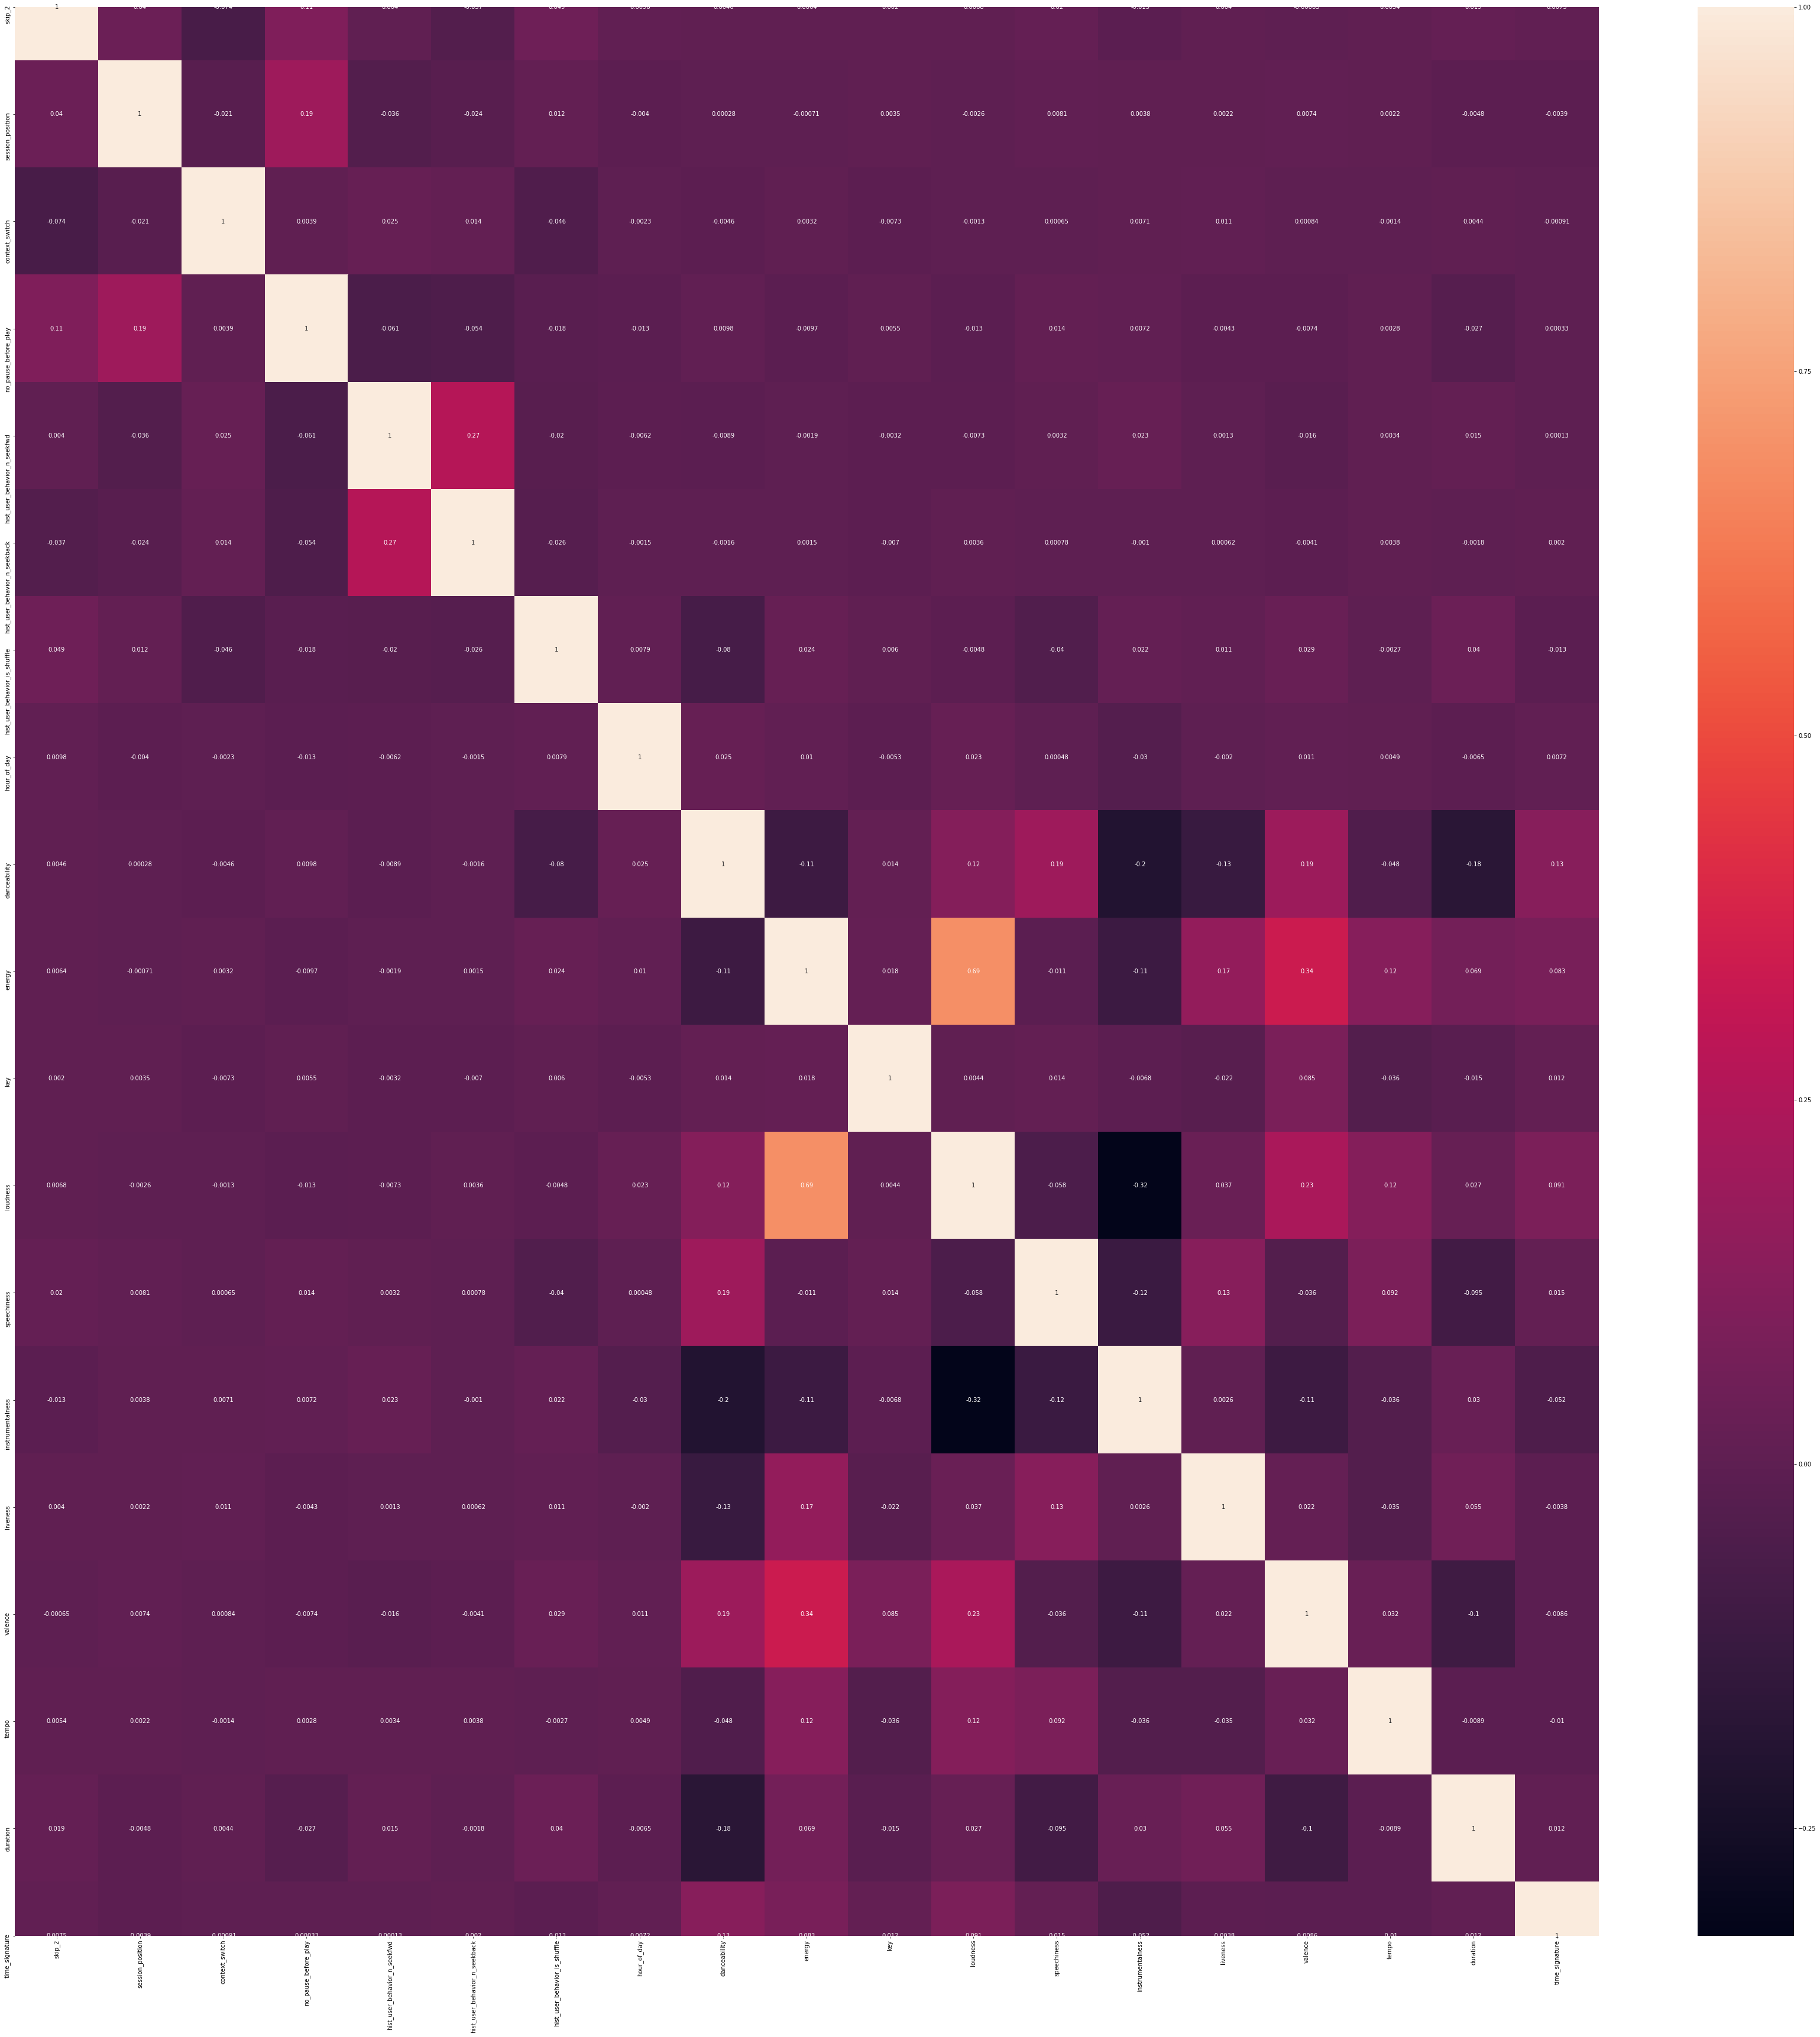

In [27]:
plt.figure(figsize=(60,60))
sns.heatmap(dataset.corr(),annot=True)

For better visualization, we can zoom our heatmap.

In [33]:
!pip install plotly

In [28]:
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot

In [29]:
trace = go.Bar(x=dataset.corr()['skip_2'].index,y=dataset.corr()['skip_2'])
iplot([trace])

We can see that there are some variables which are positively highly correlated with **skip_2** column such as **skip_1, skip_3** and **no_pause_before_play.**

### Average duration of a session

In [30]:
dataset['duration'].describe()

count    167880.000000
mean        215.893484
std          60.223626
min          30.013330
25%         183.503403
50%         212.027023
75%         240.800003
max        1787.760986
Name: duration, dtype: float64

### Checking wether we have an imbalanced dataset or not

In [31]:
trace2 = go.Pie(labels=dataset['skip_2'].value_counts().index,values=dataset['skip_2'].value_counts(),hoverinfo='label+percent',textinfo='value')
iplot([trace2])

We can conclude that we have a balanced dataset because both values of our target feature are almost equals.

### We are going to change the type of the  feature 'date' as datetime.

In [32]:
dataset_cat.head()

,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,mode
0,editorial_playlist,trackdone,trackdone,major
1,editorial_playlist,fwdbtn,endplay,major
2,user_collection,trackdone,trackdone,major
3,editorial_playlist,fwdbtn,trackdone,major
4,editorial_playlist,trackdone,fwdbtn,major


### One hot Encoding on categorical column

In [33]:
dataset_cat['context_type'] = dataset_cat ['context_type'].replace({
    'editorial_playlist': 1,
    'user_collection': 2,
    'radio':3,
    'personalized_playlist' : 4,
    'catalog': 5,
    'charts' : 6
})
dataset_cat['hist_user_behavior_reason_start'] = dataset_cat ['hist_user_behavior_reason_start'].replace({
    'trackdone': 1,
    'fwdbtn': 2,
    'backbtn':3,
    'clickrow' : 4,
    'appload': 5,
    'playbtn' : 6,
    'remote' : 7,
    'trackerror' : 8,
    'endplay' : 9
})
dataset_cat['hist_user_behavior_reason_end'] = dataset_cat['hist_user_behavior_reason_end'].replace({
    'trackdone': 1,
    'fwdbtn': 2,
    'backbtn':3,
    'endplay' : 4,
    'logout' : 5,
    "remote":6,
    "clickrow":7

})
dataset_cat['mode'] = dataset_cat['mode'].replace({
    'major': 1,
    'minor': 0
})

In [34]:
dataset_cat.head()

,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,mode
0,1,1,1,1
1,1,2,4,1
2,2,1,1,1
3,1,2,1,1
4,1,1,2,1


### Data Preprocessing: Numerical Feature

In [35]:
dataset_num.head()

,skip_2,session_position,context_switch,no_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,danceability,energy,key,loudness,speechiness,instrumentalness,liveness,valence,tempo,duration,time_signature
0,False,1,0,0,0,0,True,16,0.653119,0.553465,1,-6.577,0.069717,0.003484,0.678553,0.152255,134.024994,180.066666,4
1,False,7,0,0,0,0,False,17,0.653119,0.553465,1,-6.577,0.069717,0.003484,0.678553,0.152255,134.024994,180.066666,4
2,False,6,0,0,0,0,False,21,0.653119,0.553465,1,-6.577,0.069717,0.003484,0.678553,0.152255,134.024994,180.066666,4
3,False,9,0,1,0,0,False,18,0.653119,0.553465,1,-6.577,0.069717,0.003484,0.678553,0.152255,134.024994,180.066666,4
4,False,7,0,0,0,0,True,19,0.653119,0.553465,1,-6.577,0.069717,0.003484,0.678553,0.152255,134.024994,180.066666,4


In [36]:
dataset_num.dtypes

skip_2                              bool
session_position                   int64
context_switch                     int64
no_pause_before_play               int64
hist_user_behavior_n_seekfwd       int64
hist_user_behavior_n_seekback      int64
hist_user_behavior_is_shuffle       bool
hour_of_day                        int64
danceability                     float64
energy                           float64
key                                int64
loudness                         float64
speechiness                      float64
instrumentalness                 float64
liveness                         float64
valence                          float64
tempo                            float64
duration                         float64
time_signature                     int64
dtype: object

In [37]:
dataset_num['duration'] = (dataset_num["duration"]*1000)

In [38]:
dataset_num['hist_user_behavior_is_shuffle'] = dataset_num['hist_user_behavior_is_shuffle'].replace({
    True: 1,
    False: 0
})

In [39]:
dataset_num.head()

,skip_2,session_position,context_switch,no_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,danceability,energy,key,loudness,speechiness,instrumentalness,liveness,valence,tempo,duration,time_signature
0,False,1,0,0,0,0,1,16,0.653119,0.553465,1,-6.577,0.069717,0.003484,0.678553,0.152255,134.024994,180066.665649,4
1,False,7,0,0,0,0,0,17,0.653119,0.553465,1,-6.577,0.069717,0.003484,0.678553,0.152255,134.024994,180066.665649,4
2,False,6,0,0,0,0,0,21,0.653119,0.553465,1,-6.577,0.069717,0.003484,0.678553,0.152255,134.024994,180066.665649,4
3,False,9,0,1,0,0,0,18,0.653119,0.553465,1,-6.577,0.069717,0.003484,0.678553,0.152255,134.024994,180066.665649,4
4,False,7,0,0,0,0,1,19,0.653119,0.553465,1,-6.577,0.069717,0.003484,0.678553,0.152255,134.024994,180066.665649,4


### Concatenate our categorical dataset and numerical dataset

In [40]:
final_dataset = pd.concat([dataset_cat,dataset_num],axis=1)

In [41]:
final_dataset.head()

,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,mode,skip_2,session_position,context_switch,no_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,danceability,energy,key,loudness,speechiness,instrumentalness,liveness,valence,tempo,duration,time_signature
0,1,1,1,1,False,1,0,0,0,0,1,16,0.653119,0.553465,1,-6.577,0.069717,0.003484,0.678553,0.152255,134.024994,180066.665649,4
1,1,2,4,1,False,7,0,0,0,0,0,17,0.653119,0.553465,1,-6.577,0.069717,0.003484,0.678553,0.152255,134.024994,180066.665649,4
2,2,1,1,1,False,6,0,0,0,0,0,21,0.653119,0.553465,1,-6.577,0.069717,0.003484,0.678553,0.152255,134.024994,180066.665649,4
3,1,2,1,1,False,9,0,1,0,0,0,18,0.653119,0.553465,1,-6.577,0.069717,0.003484,0.678553,0.152255,134.024994,180066.665649,4
4,1,1,2,1,False,7,0,0,0,0,1,19,0.653119,0.553465,1,-6.577,0.069717,0.003484,0.678553,0.152255,134.024994,180066.665649,4


In [53]:
final_dataset.shape

(167880, 23)

### 4- Machine Learning Algorithm

### a- Light GBM

In [4]:
!pip install lightGBM

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, roc_auc_score
from datetime import datetime
import lightgbm as lgb

In [54]:
X = final_dataset.drop(['skip_2'],axis = "columns")
Y = final_dataset.skip_2

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [56]:
train_data = lgb.Dataset(X_train,label=y_train)

In [61]:
#setting parameters for lightgbm
lgbm_params = {'learning_rate':0.23, 'boosting_type':'dart',
              'objective':'binary',
              'metric':['auc', 'binary_logloss'],
              'num_leaves':2500,
              'max_depth':5,
              "min_data_in_leaf": 200,
              "lambda_l1": 15,
              "lambda_l2": 70,
              "min_gain_to_split": 2,
              "bagging_fraction": 0.7,
              "bagging_freq": 1,
              "feature_fraction": 0.9}

In [62]:
#training our model using light gbm
start = datetime.now()
lgbm = lgb.train(lgbm_params,train_data,200)
stop = datetime.now()

[LightGBM] [Info] Number of positive: 65065, number of negative: 60845
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004581 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2425
[LightGBM] [Info] Number of data points in the train set: 125910, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.516758 -> initscore=0.067057
[LightGBM] [Info] Start training from score 0.067057
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [63]:
#Execution time of the model
execution_time_lgbm = stop-start
execution_time_lgbm

datetime.timedelta(seconds=6, microseconds=769705)

In [64]:
#predicting on test set
yprediction = lgbm.predict(X_test)
yprediction[0:20]  # showing first 20 predictions

array([0.90100731, 0.00356613, 0.00287499, 0.92843382, 0.00373396,
       0.98471744, 0.00210118, 0.72954598, 0.64225662, 0.82322959,
       0.91203337, 0.00202466, 0.00352556, 0.73227283, 0.00882994,
       0.45653535, 0.55244712, 0.49858645, 0.00211577, 0.01397382])

In [113]:
yprediction.shape

(41970,)

In [114]:
for i in range(0,41970):
    if yprediction[i]>=0.5:
        yprediction[i]=1
    else:
        yprediction[i]=0

In [117]:
# Calculating accuracy
accuracy_lgbm = accuracy_score(yprediction,y_test)
accuracy_lgbm

0.8823445318084346

In [118]:
# Confusion Matrix
confusion_matrix = confusion_matrix(y_test,yprediction)
confusion_matrix

array([[17002,  3262],
       [ 1676, 20030]], dtype=int64)

In [120]:
def plot_confusion_matrix(cm,titre='Confusion Matrix'):
    plt.imshow(cm,cmap=plt.cm.Blues)
    plt.title(titre)
    plt.colorbar()
    labels = ['positif','negatif']
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks,labels,rotation=45)
    plt.yticks(tick_marks,labels)
    plt.tight_layout()
    plt.xlabel('True Labels')
    plt.ylabel('Predictive Labels')

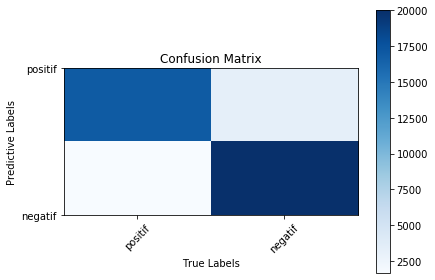

In [121]:
plot_confusion_matrix(confusion_matrix)

In [119]:
# F1_score
F1Score = f1_score(y_test,yprediction)
F1Score

0.8902617894128627

The F1_score reachs almost **90%** which is pretty good. 

In [124]:
#calculating roc_auc_score for light gbm. 
auc_lgbm = roc_auc_score(y_test,yprediction)
auc_lgbm

0.8809055990275093

### Save our Model

In [50]:
import pickle

In [65]:
file = open('GBM_model.pkl','wb')
pickle.dump(lgbm,file)